In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
df = pd.read_csv("Mall_Customers.csv")
df.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [206]:
df.tail(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [208]:
df.shape

(200, 5)

In [209]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [210]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [211]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 200 rows and 5 columns


Text(0.5, 1.0, 'Age Distribution')

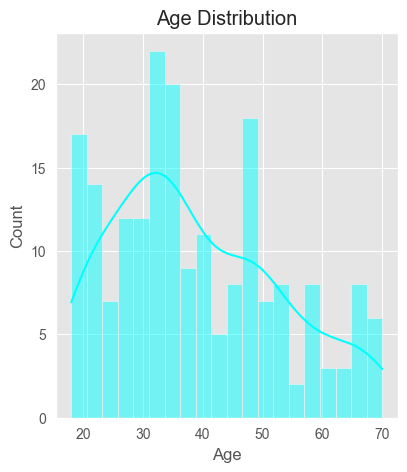

In [212]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True,color='cyan')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Income Distribution')

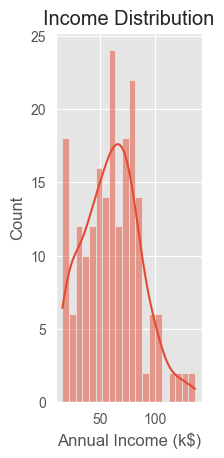

In [213]:
plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Income Distribution')

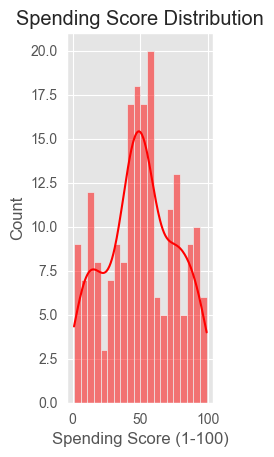

In [214]:
plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True,color='red')
plt.title('Spending Score Distribution')
plt.show()

C:\Users\Pallav\AppData\Local\Temp\ipykernel_2692\2753250697.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df,palette=['#45B7D1','#FF6B6B'])


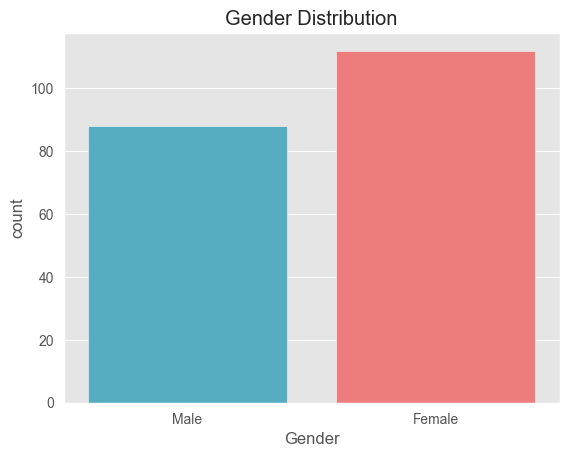

In [215]:
sns.countplot(x='Gender', data=df,palette=['#45B7D1','#FF6B6B'])
plt.title('Gender Distribution')
plt.show()

In [216]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [217]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [218]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

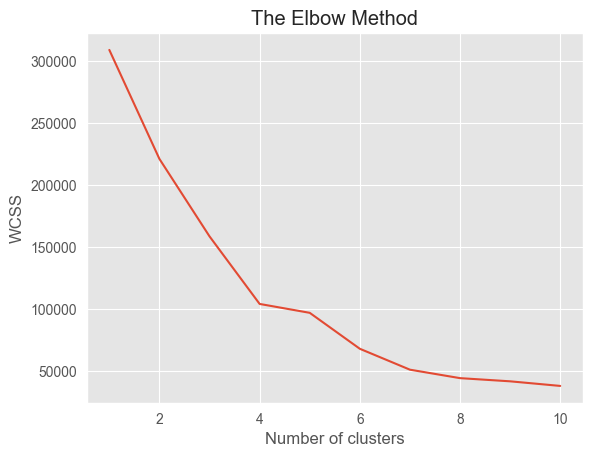

In [219]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [220]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X)


df['Cluster'] = clusters

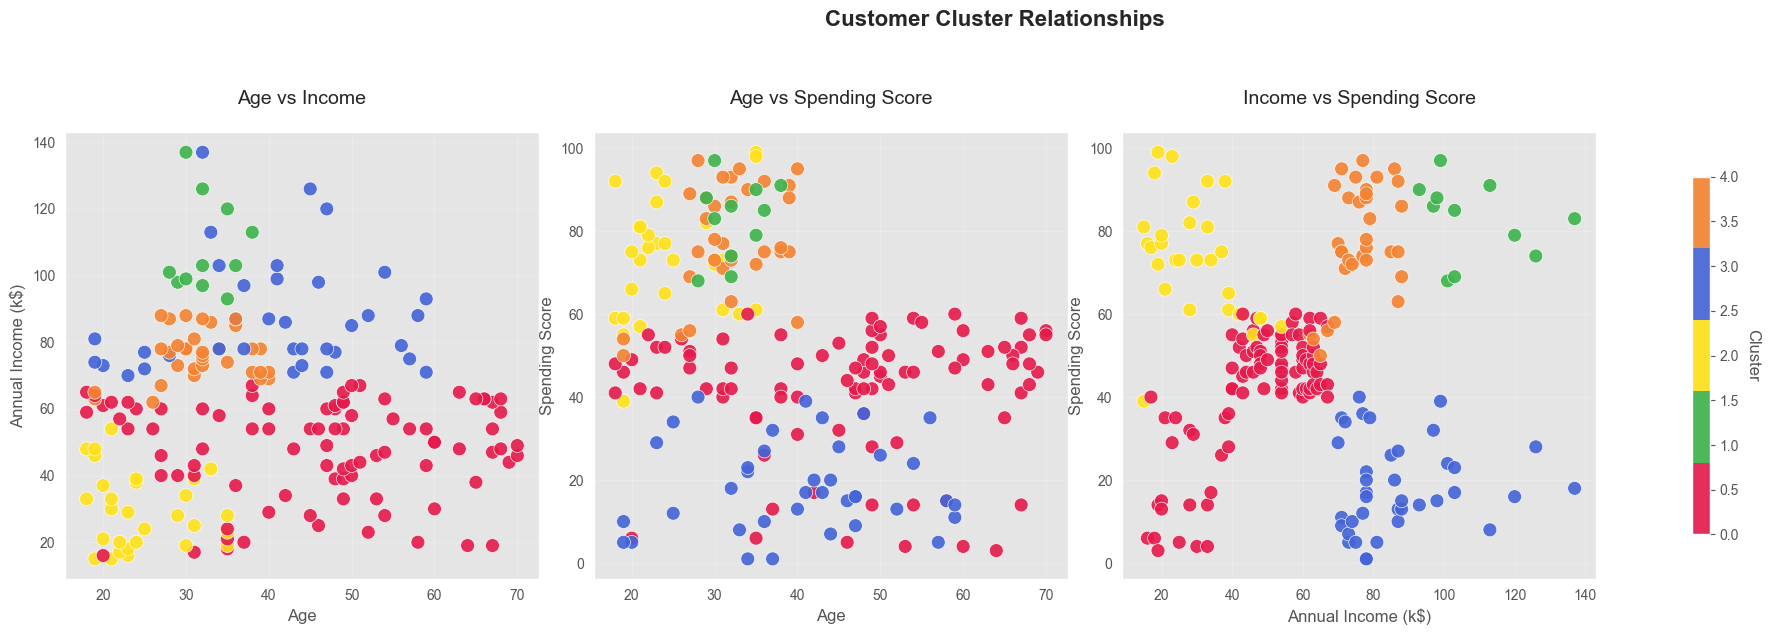

In [221]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(20, 6))
plt.suptitle("Customer Cluster Relationships", y=1.05, fontsize=16, fontweight='bold')

# Use a more distinct qualitative colormap
#custom_palette = ['#117733', '#332288', '#AA4499', '#88CCEE', '#DDCC77']
custom_palette = ['#E6194B', '#3CB44B', '#FFE119', '#4363D8', '#F58231']

# 1. Age vs Income
plt.subplot(1, 3, 1)
sc = plt.scatter(df['Age'], df['Annual Income (k$)'], 
                c=df['Cluster'], cmap=ListedColormap(custom_palette), s=100, alpha=0.9, edgecolor='w', linewidth=0.5)
plt.title("Age vs Income", pad=20, fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Annual Income (k$)", fontsize=12)
plt.grid(alpha=0.2)

# 2. Age vs Spending
plt.subplot(1, 3, 2)
plt.scatter(df['Age'], df['Spending Score (1-100)'], 
           c=df['Cluster'], cmap=ListedColormap(custom_palette), s=100, alpha=0.9, edgecolor='w', linewidth=0.5)
plt.title("Age vs Spending Score", pad=20, fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Spending Score", fontsize=12)
plt.grid(alpha=0.2)

# 3. Income vs Spending
plt.subplot(1, 3, 3)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
           c=df['Cluster'], cmap=ListedColormap(custom_palette), s=100, alpha=0.9, edgecolor='w', linewidth=0.5)
plt.title("Income vs Spending Score", pad=20, fontsize=14)
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score", fontsize=12)
plt.grid(alpha=0.2)

plt.tight_layout()
cbar = plt.colorbar(sc, ax=plt.gcf().get_axes(), shrink=0.8)
cbar.set_label('Cluster', rotation=270, labelpad=15, fontsize=12)
plt.show()

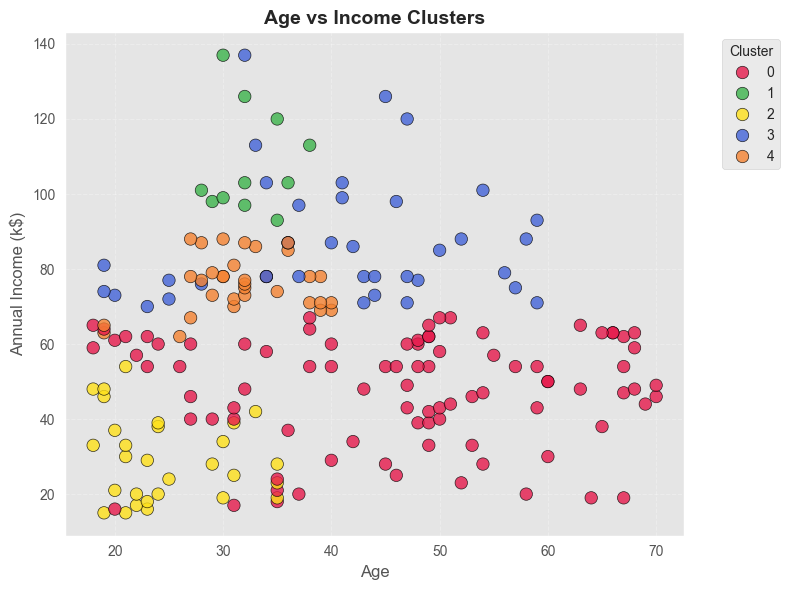

In [222]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Age', 
    y='Annual Income (k$)', 
    hue='Cluster', 
    data=df, 
    palette=custom_palette,
    s=80,
    alpha=0.8,
    edgecolor='black',
    linewidth=0.5
)
plt.title("Age vs Income Clusters", fontsize=14, fontweight='bold')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Annual Income (k$)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

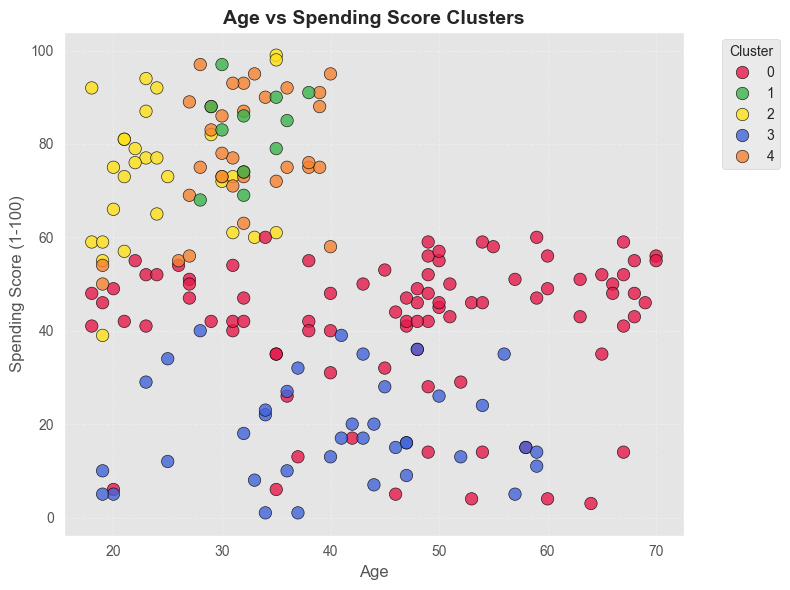

In [223]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Age', 
    y='Spending Score (1-100)', 
    hue='Cluster', 
    data=df, 
    palette=custom_palette,
    s=80,
    alpha=0.8,
    edgecolor='black',
    linewidth=0.5
)
plt.title("Age vs Spending Score Clusters", fontsize=14, fontweight='bold')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

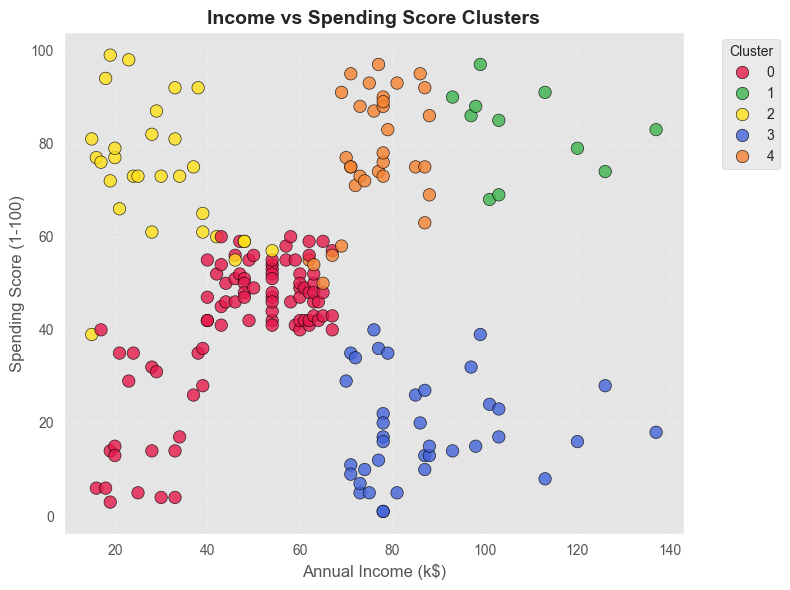

In [224]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    hue='Cluster', 
    data=df, 
    palette=custom_palette,
    s=80,
    alpha=0.8,
    edgecolor='black',
    linewidth=0.5
)
plt.title("Income vs Spending Score Clusters", fontsize=14, fontweight='bold')
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

=== Cluster Statistics ===
           Age               Annual Income (k$)                \
          mean median    std               mean median    std   
Cluster                                                         
0        46.21   48.0  14.83              47.72   50.0  14.43   
1        32.45   32.0   3.17             108.18  103.0  14.00   
2        24.69   23.0   5.52              29.59   28.0  11.23   
3        40.39   41.5  11.38              87.00   80.0  16.27   
4        31.79   32.0   5.32              76.09   77.0   7.30   

        Spending Score (1-100)                 Gender Size  
                          mean median    std <lambda>       
Cluster                                                     
0                        41.80   46.0  14.82     0.62   89  
1                        82.73   85.0   9.30     0.55   11  
2                        73.66   73.0  14.19     0.52   29  
3                        18.63   16.5  10.92     0.47   38  
4                        

C:\Users\Pallav\AppData\Local\Temp\ipykernel_2692\1993914461.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y=metric, data=df, estimator='mean',
C:\Users\Pallav\AppData\Local\Temp\ipykernel_2692\1993914461.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y=metric, data=df, estimator='mean',
C:\Users\Pallav\AppData\Local\Temp\ipykernel_2692\1993914461.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y=metric, data=df, estimator='mean',


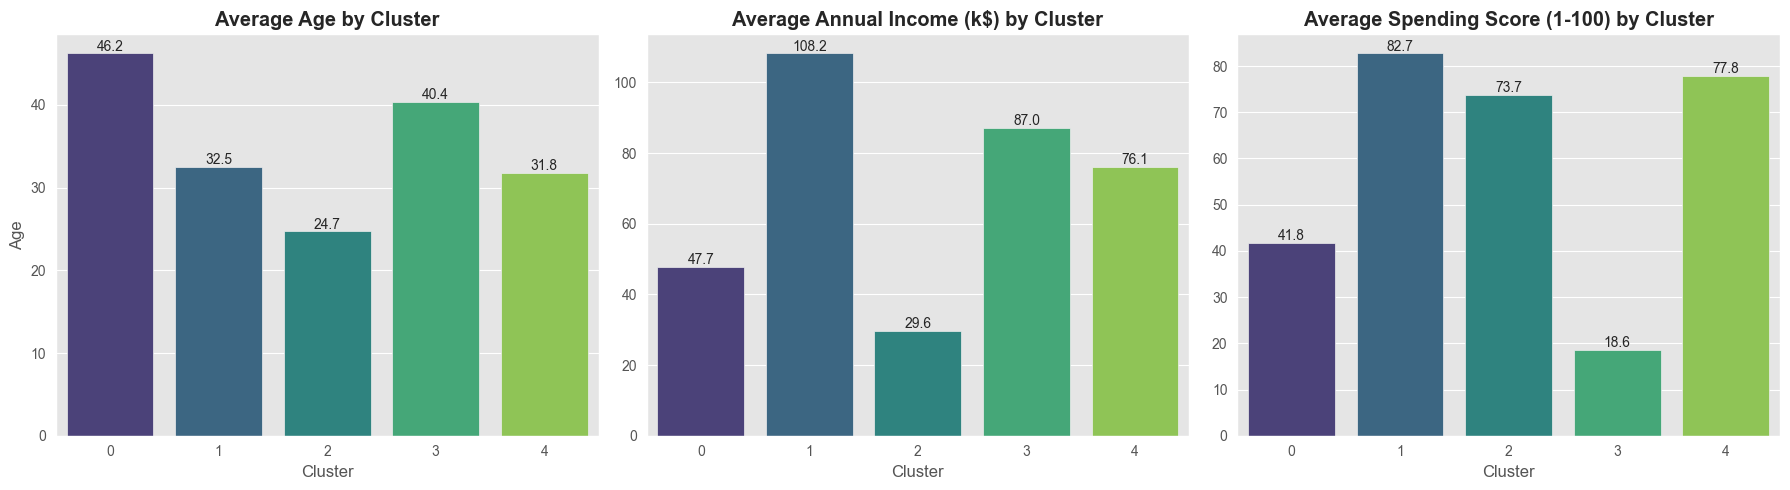

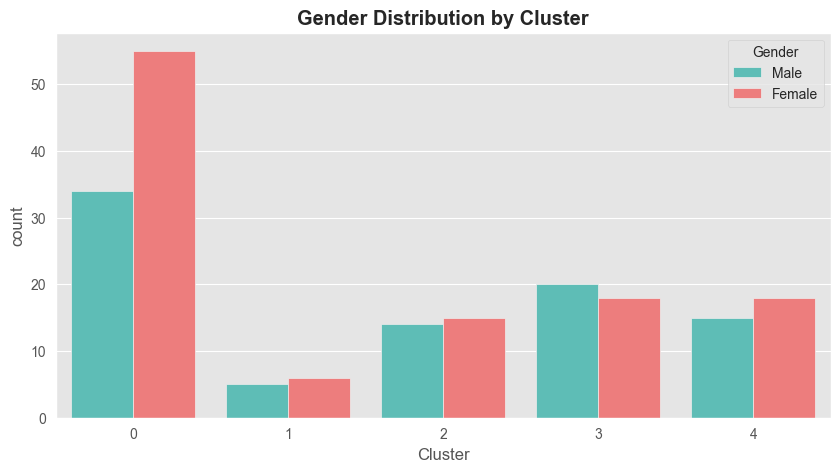

In [225]:
# Enhanced Cluster Analysis
cluster_stats = df.groupby('Cluster').agg({
    'Age': ['mean', 'median', 'std'],
    'Annual Income (k$)': ['mean', 'median', 'std'],
    'Spending Score (1-100)': ['mean', 'median', 'std'],
    'Gender': lambda x: (x == 1).mean()  # % Female
}).round(2)

# Add cluster sizes
cluster_stats['Size'] = df['Cluster'].value_counts().sort_index()

print("=== Cluster Statistics ===")
print(cluster_stats)

# Enhanced Visualization
plt.figure(figsize=(18, 5))
metrics = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.barplot(x='Cluster', y=metric, data=df, estimator='mean', 
                errorbar=None, palette='viridis')
    
    # Add data labels
    for p in plt.gca().patches:
        plt.gca().annotate(f"{p.get_height():.1f}", 
                          (p.get_x() + p.get_width()/2., p.get_height()),
                          ha='center', va='center', 
                          xytext=(0, 5), textcoords='offset points')
    
    plt.title(f'Average {metric} by Cluster', fontweight='bold')
    plt.ylabel(metric if i == 1 else '')  # Only show y-label for first plot

plt.tight_layout()
plt.show()

# Gender Distribution by Cluster
plt.figure(figsize=(10, 5))
sns.countplot(x='Cluster', hue='Gender', data=df, 
              palette=['#4ECDC4', '#FF6B6B'])
plt.title('Gender Distribution by Cluster', fontweight='bold')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

=== SEGMENTATION QUALITY ===
Silhouette Score: 0.36 (0-1 scale)
Interpretation: Moderate separation with clear business value

=== CUSTOMER SEGMENTS ===


,Cluster,Age,Income,Spending,Gender,Segment Name,Key Characteristics
0,0,46 yrs,$48k,42/100,62% female,Young Trend-Spenders,Low income but high spending
1,1,32 yrs,$108k,83/100,55% female,Affluent Professionals,Top income & spending
2,2,25 yrs,$30k,74/100,52% female,Balanced Spenders,"Good income, high spending"
3,3,40 yrs,$87k,19/100,47% female,Conservative Savers,High income but low spending
4,4,32 yrs,$76k,78/100,55% female,Midlife Moderates,Medium income & spending



=== RECOMMENDED STRATEGIES ===

Group 0 Strategies (Young Trend-Spenders):
   • 🎯 Social media influencer campaigns
   • 🛒 Flexible payment plans
   • 🎓 Student/young adult discounts

Group 1 Strategies (Affluent Professionals):
   • ✈️ Premium travel experiences
   • ⏱️ Time-saving services
   • 🛍️ Exclusive early product access

Group 2 Strategies (Balanced Spenders):
   • 👪 Family bundle deals
   • 🏠 Home lifestyle packages
   • 🎁 Quality mid-range products

Group 3 Strategies (Conservative Savers):
   • 💰 Clearance sales alerts
   • 📉 Price drop notifications
   • 🏷️ Value-focused promotions

Group 4 Strategies (Midlife Moderates):
   • 👔 Professional/work collections
   • 🏥 Health/wellness packages
   • ☎️ Traditional customer service



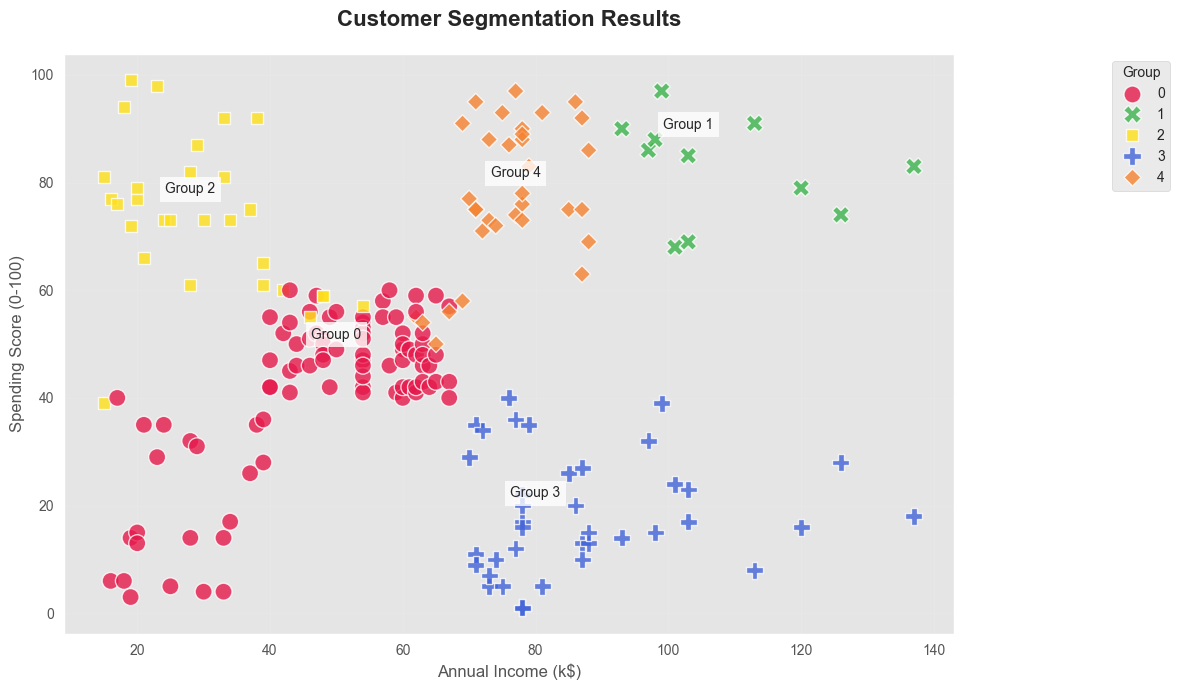

In [226]:
# ======================
# FINAL SEGMENTATION REPORT
# ======================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

# 1. Cluster Performance Summary
print("=== SEGMENTATION QUALITY ===")
print(f"Silhouette Score: {silhouette_score(X, df['Cluster']):.2f} (0-1 scale)")
print("Interpretation: Moderate separation with clear business value\n")

# 2. Cluster Profiles Table
cluster_profiles = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'Gender': lambda x: f"{(x == 1).mean():.0%} female"
}).reset_index()

# Add segment names and characteristics
segments = [
    ("Young Trend-Spenders", "Low income but high spending"),
    ("Affluent Professionals", "Top income & spending"), 
    ("Balanced Spenders", "Good income, high spending"),
    ("Conservative Savers", "High income but low spending"),
    ("Midlife Moderates", "Medium income & spending")
]

cluster_profiles['Segment Name'] = [s[0] for s in segments]
cluster_profiles['Key Characteristics'] = [s[1] for s in segments]

# Format and display (without blue hues)
print("=== CUSTOMER SEGMENTS ===")
display(cluster_profiles[[
    'Cluster', 'Age', 'Annual Income (k$)', 
    'Spending Score (1-100)', 'Gender',
    'Segment Name', 'Key Characteristics'
]].rename(columns={
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'Spending'
}).style.format({
    'Age': '{:.0f} yrs',
    'Income': '${:.0f}k', 
    'Spending': '{:.0f}/100'
}))


# ======================
# MARKETING STRATEGIES
# ======================

print("""
=== RECOMMENDED STRATEGIES ===

Group 0 Strategies (Young Trend-Spenders):
   • 🎯 Social media influencer campaigns
   • 🛒 Flexible payment plans
   • 🎓 Student/young adult discounts

Group 1 Strategies (Affluent Professionals):
   • ✈️ Premium travel experiences
   • ⏱️ Time-saving services
   • 🛍️ Exclusive early product access

Group 2 Strategies (Balanced Spenders):
   • 👪 Family bundle deals
   • 🏠 Home lifestyle packages
   • 🎁 Quality mid-range products

Group 3 Strategies (Conservative Savers):
   • 💰 Clearance sales alerts
   • 📉 Price drop notifications
   • 🏷️ Value-focused promotions

Group 4 Strategies (Midlife Moderates):
   • 👔 Professional/work collections
   • 🏥 Health/wellness packages
   • ☎️ Traditional customer service
""")

# 4. Final Visualization (using group numbers only)
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    x='Annual Income (k$)', 
    y='Spending Score (1-100)',
    hue='Cluster',
    palette=custom_palette,
    style='Cluster',
    data=df,
    s=150,
    alpha=0.8
)

# Label with group numbers only
for cluster in df['Cluster'].unique():
    x = df[df['Cluster'] == cluster]['Annual Income (k$)'].median()
    y = df[df['Cluster'] == cluster]['Spending Score (1-100)'].median()
    scatter.text(x, y+5, f"Group {cluster}", 
                fontsize=10, ha='center',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.title("Customer Segmentation Results", fontsize=16, pad=20, fontweight='bold')
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score (0-100)", fontsize=12)
plt.grid(alpha=0.1)
plt.legend(bbox_to_anchor=(1.25, 1), title='Group')
plt.tight_layout()
plt.savefig('images/segmentation_results.jpg', dpi=300, bbox_inches='tight')
plt.show()